# Test yt data I/O

In [1]:
import yt

Import Athena MHD dataset and scale to appropriate units
and **subdivide dataset into the virtual grids**

In [75]:
'''
Override units before exporting a dataset
'''
units_override = {
    "length_unit": (1.0e8, "cm"),
    "time_unit": (1.0, "s"),
    "mass_unit": (1.6e-24, "g"),
}

ds = yt.load('./datasets/ShockCloud/id1/Cloud-id1.0050.vtk', nprocs=16)

'''
ds = yt.load("sloshing.0000.vtk", nprocs=8)
Some 3D Athena outputs may have large grids 
(especially parallel datasets subsequently joined with the join_vtk script), 
and may benefit from being subdivided into “virtual grids”. 
For this purpose, one can pass in the nprocs parameter
'''
# ds.derived_field_list

yt : [INFO     ] 2023-02-09 19:33:43,400 Temporarily setting domain_right_edge = -domain_left_edge. This will be corrected automatically if it is not the case.
yt : [WARNING  ] 2023-02-09 19:33:43,402 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-02-09 19:33:43,403 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-02-09 19:33:43,404 Assuming 1.0 = 1.0 g
yt : [INFO     ] 2023-02-09 19:33:43,480 Parameters: current_time              = 0.5002712
yt : [INFO     ] 2023-02-09 19:33:43,481 Parameters: domain_dimensions         = [13 64 64]
yt : [INFO     ] 2023-02-09 19:33:43,482 Parameters: domain_left_edge          = [-0.5 -2.5 -2.5]
yt : [INFO     ] 2023-02-09 19:33:43,483 Parameters: domain_right_edge         = [0.5 2.5 2.5]
yt : [INFO     ] 2023-02-09 19:33:43,485 Parameters: cosmological_simulation   = 0


[('athena', 'density'),
 ('athena', 'momentum_x'),
 ('athena', 'momentum_y'),
 ('athena', 'momentum_z'),
 ('athena', 'scalar[0]'),
 ('athena', 'total_energy')]

### Preview a dataset

yt : [INFO     ] 2023-02-09 19:33:48,057 Projection completed
yt : [INFO     ] 2023-02-09 19:33:48,059 xlim = -2.500000 2.500000
yt : [INFO     ] 2023-02-09 19:33:48,060 ylim = -2.500000 2.500000
yt : [INFO     ] 2023-02-09 19:33:48,061 xlim = -2.500000 2.500000
yt : [INFO     ] 2023-02-09 19:33:48,062 ylim = -2.500000 2.500000
yt : [INFO     ] 2023-02-09 19:33:48,065 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



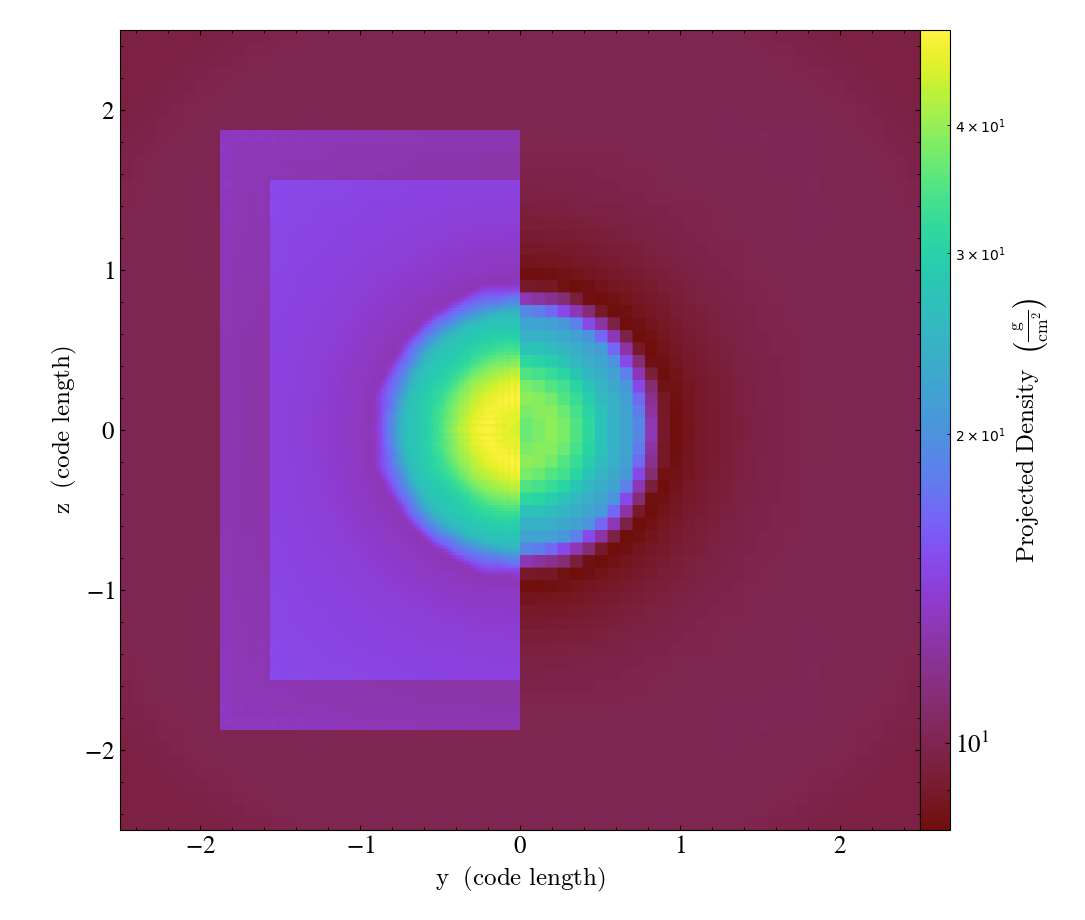

In [71]:
prj = yt.ProjectionPlot(ds, "x", ("gas", "density"))
prj.show()

In [54]:
ds.domain_width

In [55]:
print(ds.particle_types)
print(ds.particle_types_raw)
print(ds.particle_type_counts)

('io',)
('io',)
{}


### Quick grid inspection

In [73]:
g = ds.index.grids[1]
print(g)
g.LeftEdge, g.RightEdge
#g.Children

AthenaGrid_0001 ([16 32 16])


(unyt_array([-0.5 , -2.5 , -1.25], 'code_length'),
 unyt_array([0.75, 0.  , 0.  ], 'code_length'))

In [65]:
gs = ds.index.select_grids(ds.index.max_level)
g2 = gs[0]
print(g2)
print(g2.Parent)
print(g2.get_global_startindex())

AthenaGrid_0128 ([49 20 20])
[AthenaGrid_0064 ([32 12 12]), AthenaGrid_0065 ([32 12 12]), AthenaGrid_0072 ([32 12 12]), AthenaGrid_0073 ([32 12 12])]
[18 48 48]


In [38]:
for f in ds.field_list:
    fv = g[f]
    if fv.size == 0:
        continue
    print(f, type(fv), fv.shape, fv.min(), fv.max())

('athena', 'density') <class 'unyt.array.unyt_array'> (16, 32, 32) 1.9777566194534302 code_mass/code_length**3 58.165626525878906 code_mass/code_length**3
('athena', 'momentum_x') <class 'unyt.array.unyt_array'> (16, 32, 32) 17.742055892944336 code_mass/(code_length**2*code_time) 110.66072082519531 code_mass/(code_length**2*code_time)
('athena', 'momentum_y') <class 'unyt.array.unyt_array'> (16, 32, 32) -32.84679412841797 code_mass/(code_length**2*code_time) 31.176054000854492 code_mass/(code_length**2*code_time)
('athena', 'momentum_z') <class 'unyt.array.unyt_array'> (16, 32, 32) -31.176054000854492 code_mass/(code_length**2*code_time) 32.84679412841797 code_mass/(code_length**2*code_time)
('athena', 'scalar[0]') <class 'unyt.array.unyt_array'> (16, 32, 32) -1.0377570520579346e-13 dimensionless 58.165626525878906 dimensionless
('athena', 'total_energy') <class 'unyt.array.unyt_array'> (16, 32, 32) 53.637168884277344 code_pressure 719.6580810546875 code_pressure


## Create derived fields and explore the access to fields

Following **Fields in yt** page https://yt-project.org/doc/analyzing/fields.html

In [84]:
print(dir(ds.fields))
# print(dir(ds.fields.gas))
print(ds.fields.gas.density)
# for field in ds.fields.gas:
#     print(field)

['athena', 'gas', 'index']
Alias Field for ('athena', 'density') ('gas', 'density'): (units: 'g/cm**3')


In [85]:
# these examples evaluate to True for a dataset that has ('gas', 'density')
"density" in ds.fields.gas
("gas", "density") in ds.fields.gas
ds.fields.gas.density in ds.fields.gas

True

Access information about a given field, like its default units or the source code for it

In [91]:
ds.field_list
#print(ds.field_list)
#print(ds.derived_field_list)

[('athena', 'density'),
 ('athena', 'momentum_x'),
 ('athena', 'momentum_y'),
 ('athena', 'momentum_z'),
 ('athena', 'scalar[0]'),
 ('athena', 'total_energy')]

### Access a data field directly

In [100]:
ds.all_data()["density"]
#or
ds.all_data()[ds.fields.gas.density]

unyt_array([3.87679291, 3.8769722 , 3.87703872, ..., 3.32781744,
            3.32964706, 3.33869982], 'g/cm**3')

## Data objects in yt 
https://yt-project.org/doc/analyzing/objects.html#data-objects

See **General Data Analysis** https://yt-project.org/doc/analyzing/index.html